# Student data analysis


## General analysis


In [793]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


%matplotlib inline

Import data and print shape (dimensions).


In [794]:
data = pd.read_csv("student_data.csv")
data.shape


(526, 16)

In [795]:
data.head()


,gender,reason,traveltime,studytime,failures,activities,higher,siblings,freetime,hangouts_p_week,absences,maths,stats,comp_sci,parentedu,god
0,F,course,2,2,0,no,yes,2,3,4,4,F,B,B,Masters,yes
1,F,course,1,2,0,no,yes,3,3,3,2,C,B,B,10th Pass,yes
2,F,other,1,2,0,no,yes,2,3,2,6,B,B+,B,10th Pass,yes
3,F,home,1,3,0,yes,yes,2,2,2,0,B+,B+,B+,Masters,no
4,F,home,1,2,0,no,yes,2,3,2,0,B,B+,B+,Bachelors,yes


Sorting categorical data


In [796]:
data["maths"] = data["maths"].astype("category").cat.add_categories("O")
data["maths"].unique()


['F', 'C', 'B', 'B+', 'A', 'A+', 'D']
Categories (8, object): ['A', 'A+', 'B', 'B+', 'C', 'D', 'F', 'O']

In [797]:
data["comp_sci"] = data["comp_sci"].astype("category")
data["comp_sci"].unique()


['B', 'B+', 'A+', 'A', 'D', 'C', 'F', 'O']
Categories (8, object): ['A', 'A+', 'B', 'B+', 'C', 'D', 'F', 'O']

In [798]:
data["stats"] = data["stats"].astype("category")
data["stats"].unique()


['B', 'B+', 'A', 'A+', 'D', 'C', 'F', 'O']
Categories (8, object): ['A', 'A+', 'B', 'B+', 'C', 'D', 'F', 'O']

In [799]:
data["maths"] = pd.Categorical(
    data["maths"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)
data["comp_sci"] = pd.Categorical(
    data["comp_sci"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)
data["stats"] = pd.Categorical(
    data["stats"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)


In [800]:
data["parentedu"].unique()


array(['Masters', '10th Pass', 'Bachelors', '12th Pass'], dtype=object)

In [801]:
data["parentedu"] = pd.Categorical(
    data["parentedu"], ["10th Pass", "12th Pass", "Bachelors", "Masters"]
)


Print first 5 rows of data.


In [802]:
data.head(5)


,gender,reason,traveltime,studytime,failures,activities,higher,siblings,freetime,hangouts_p_week,absences,maths,stats,comp_sci,parentedu,god
0,F,course,2,2,0,no,yes,2,3,4,4,F,B,B,Masters,yes
1,F,course,1,2,0,no,yes,3,3,3,2,C,B,B,10th Pass,yes
2,F,other,1,2,0,no,yes,2,3,2,6,B,B+,B,10th Pass,yes
3,F,home,1,3,0,yes,yes,2,2,2,0,B+,B+,B+,Masters,no
4,F,home,1,2,0,no,yes,2,3,2,0,B,B+,B+,Bachelors,yes


Printing number of unique values for each object type.


In [803]:
data.select_dtypes("object").nunique()


gender        2
reason        4
activities    2
higher        2
god           2
dtype: int64

Calculate missing data (I have cleaned this data).


In [804]:
data.isnull().sum() / data.shape[0]


gender             0.0
reason             0.0
traveltime         0.0
studytime          0.0
failures           0.0
activities         0.0
higher             0.0
siblings           0.0
freetime           0.0
hangouts_p_week    0.0
absences           0.0
maths              0.0
stats              0.0
comp_sci           0.0
parentedu          0.0
god                0.0
dtype: float64

Calculate descriptive statistics for valid objects.


In [805]:
data.describe(percentiles=[])


,traveltime,studytime,failures,siblings,freetime,hangouts_p_week,absences
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,1.501901,1.979087,0.188213,2.169202,3.186312,3.174905,3.882129
std,0.740010,0.844895,0.545749,0.638363,0.998801,1.169378,4.911152
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,0.000000,2.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,3.000000,3.000000,5.000000,5.000000,32.000000


In [806]:
data.loc[(data["absences"] == 0)].shape[0] / data.shape[0] * 100


36.69201520912547

36.69% of students were never absent.


In [807]:
data.loc[(data["siblings"] > 0)].shape[0] / data.shape[0] * 100


96.95817490494296

96.96% of students have atleast one sibling


In [808]:
data.loc[(data["failures"] == 0)].shape[0] / data.shape[0] * 100


86.69201520912547

86.69% students have reported that they have not failed in the previous semester. (The analysis is based on current semester).


## Count analysis of various attributes


### Counting male and female participants


Text(0, 0.5, 'Count')

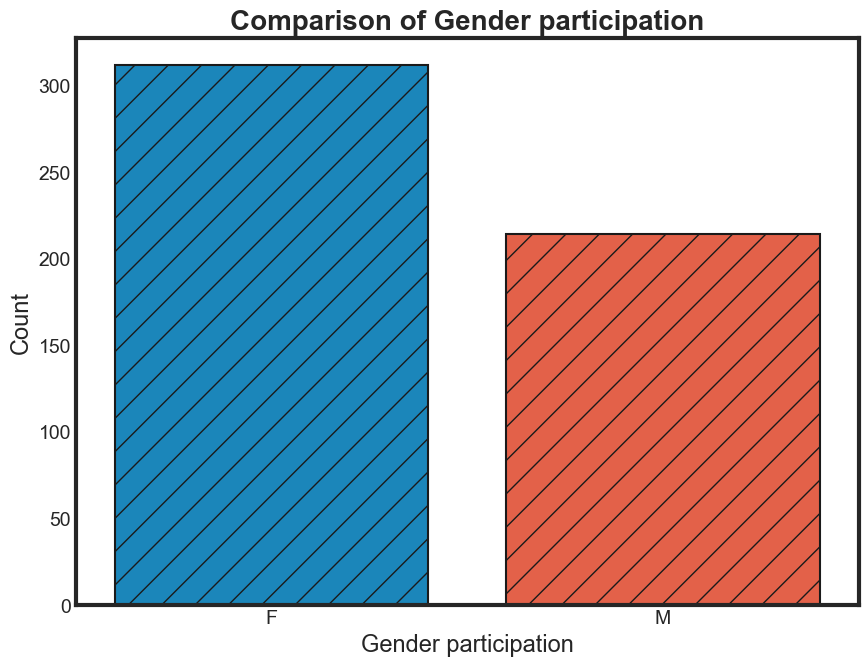

In [809]:
graph = sns.countplot(data, x="gender", edgecolor="0.1", linewidth=1.5, hatch="/")
graph.set_title("Comparison of Gender participation", weight="bold", fontsize=20)
graph.set_xlabel("Gender participation", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


In [810]:
plt.rcParams["figure.figsize"] = (9, 7)
plt.style.use("fivethirtyeight")
sns.set_style("ticks")


### Maths grade


Text(0, 0.5, 'Count')

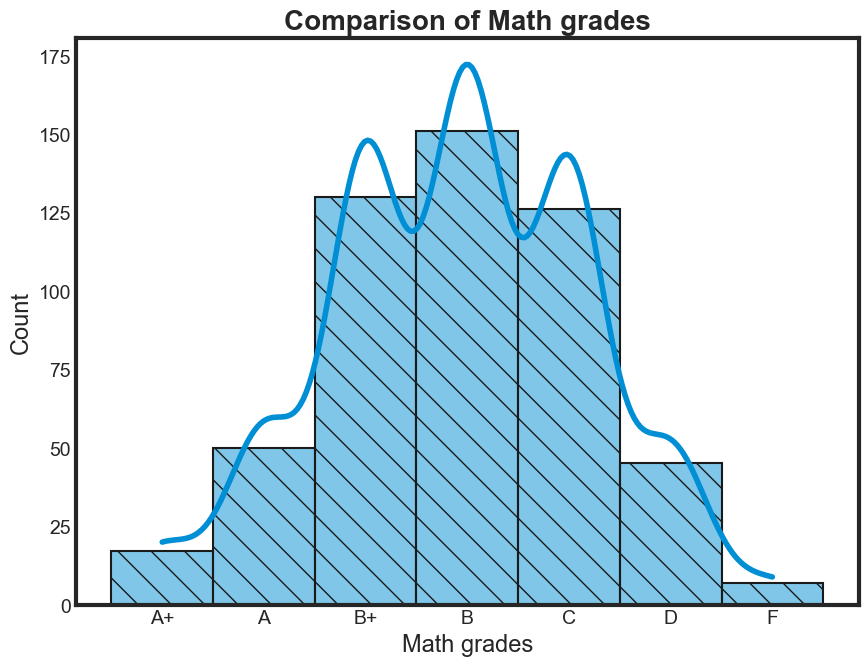

In [811]:
graph = sns.histplot(
    data, x="maths", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Math grades", weight="bold", fontsize=20)
graph.set_xlabel("Math grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

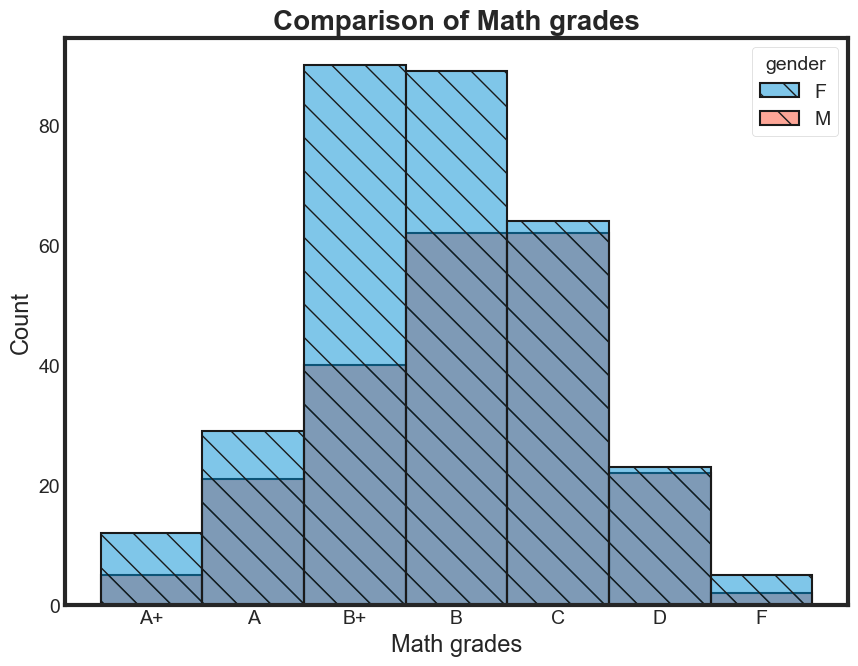

In [812]:
graph = sns.histplot(
    data, x="maths", edgecolor="0.1", linewidth=1.5, hatch="\\", hue="gender"
)
graph.set_title("Comparison of Math grades", weight="bold", fontsize=20)
graph.set_xlabel("Math grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### Computer Science grade


Text(0, 0.5, 'Count')

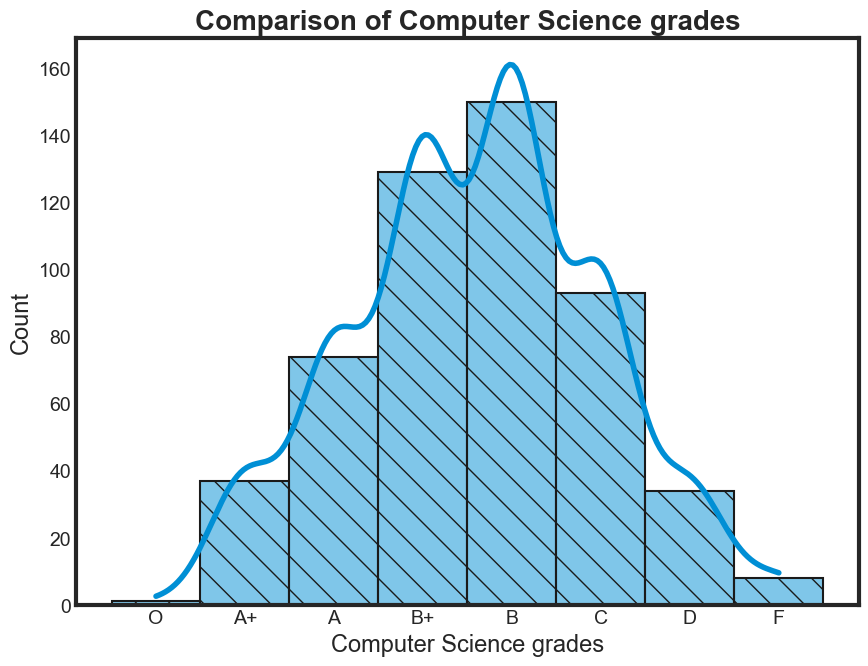

In [813]:
graph = sns.histplot(
    data, x="comp_sci", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Computer Science grades", weight="bold", fontsize=20)
graph.set_xlabel("Computer Science grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

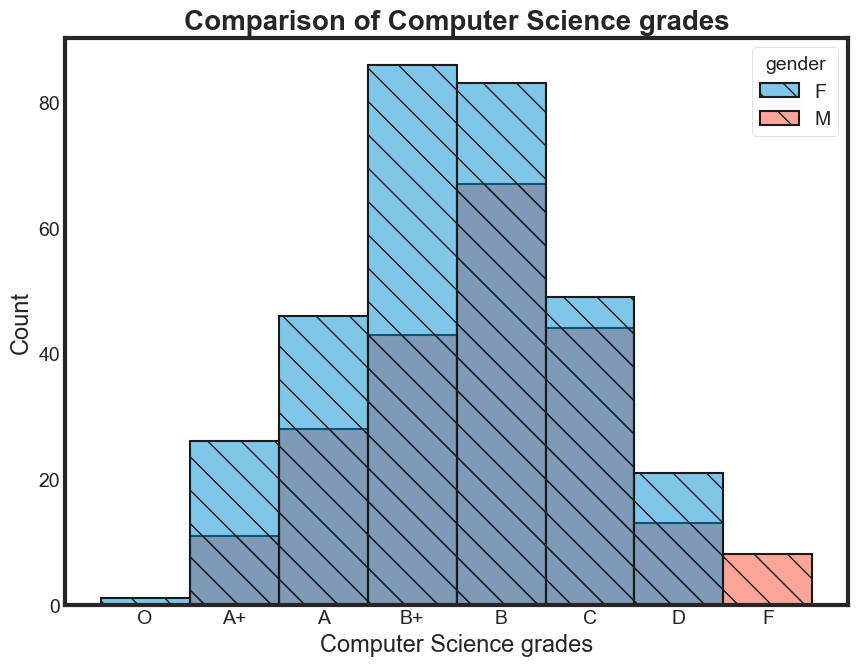

In [814]:
graph = sns.histplot(
    data, x="comp_sci", edgecolor="0.1", linewidth=1.5, hatch="\\", hue="gender"
)
graph.set_title("Comparison of Computer Science grades", weight="bold", fontsize=20)
graph.set_xlabel("Computer Science grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### Statistics grade


Text(0, 0.5, 'Count')

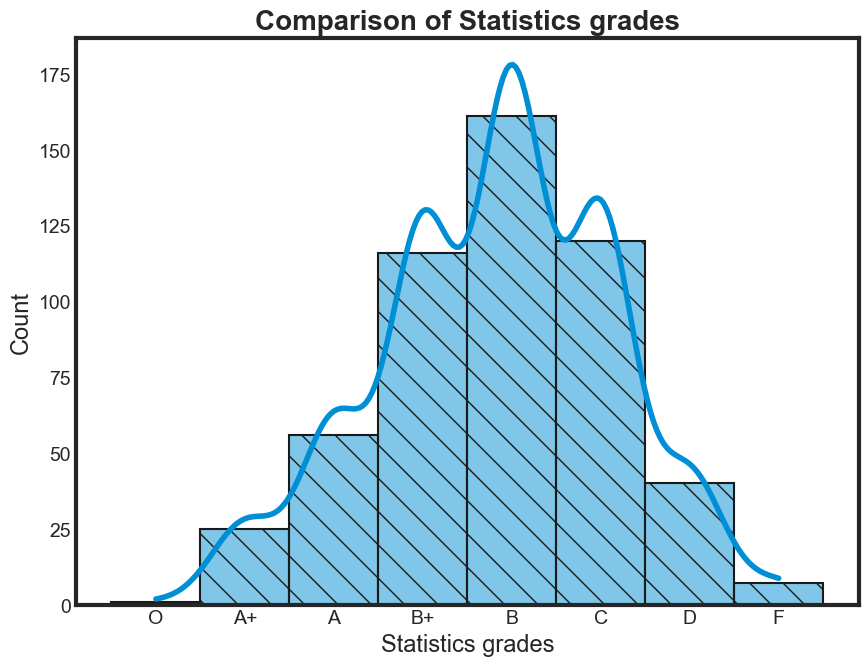

In [815]:
graph = sns.histplot(
    data, x="stats", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Statistics grades", weight="bold", fontsize=20)
graph.set_xlabel("Statistics grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

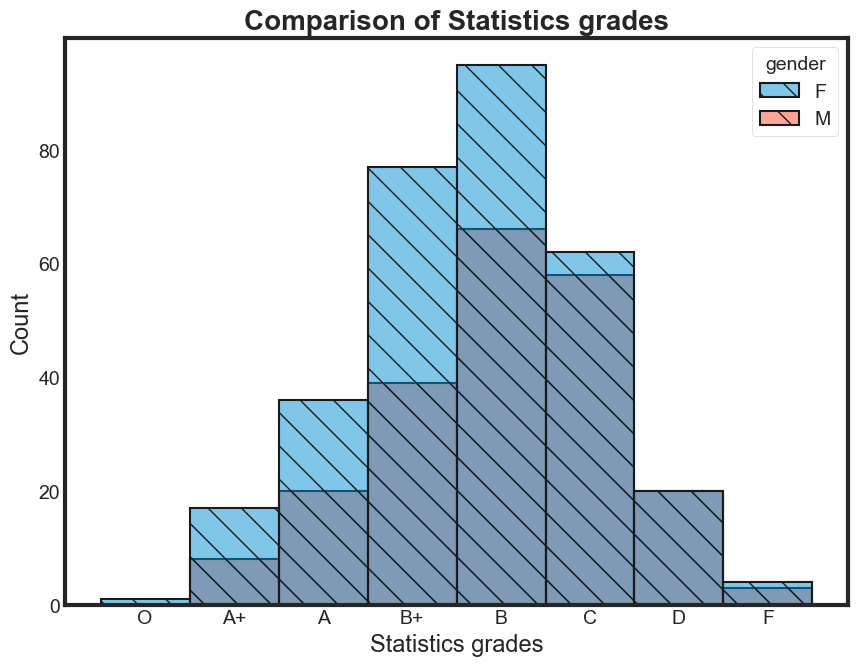

In [816]:
graph = sns.histplot(
    data, x="stats", edgecolor="0.1", linewidth=1.5, hatch="\\", hue="gender"
)
graph.set_title("Comparison of Statistics grades", weight="bold", fontsize=20)
graph.set_xlabel("Statistics grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


All grade curves look similar to a normal distribution curve


### Hangouts per week.


Text(0, 0.5, 'Count')

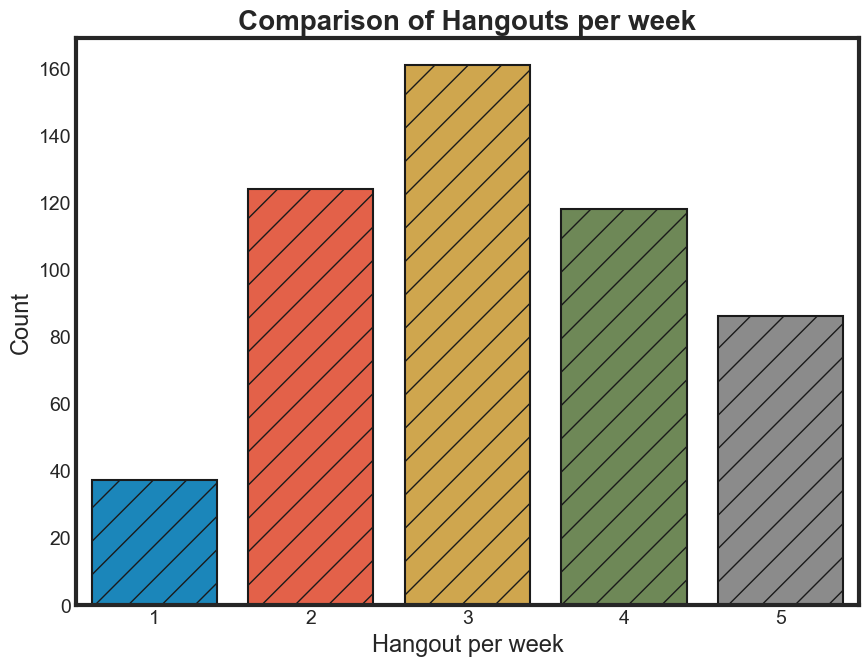

In [817]:
graph = sns.countplot(
    data, x="hangouts_p_week", edgecolor="0.1", linewidth=1.5, hatch="/"
)
graph.set_title("Comparison of Hangouts per week", weight="bold", fontsize=20)
graph.set_xlabel("Hangout per week", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### Highest level of Parental education.


Text(0, 0.5, 'Count')

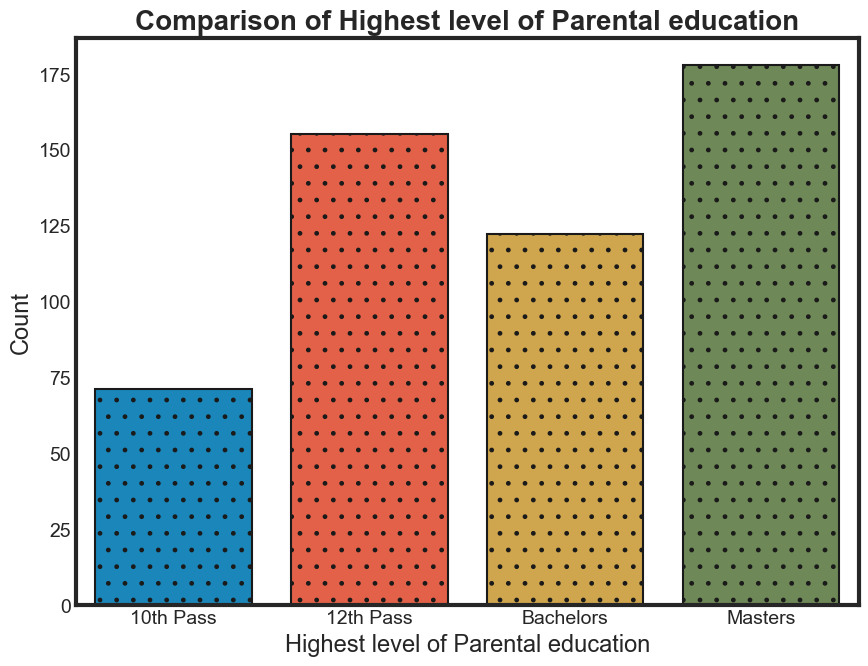

In [818]:
graph = sns.countplot(data, x="parentedu", edgecolor="0.1", linewidth=1.5, hatch=".")
graph.set_title(
    "Comparison of Highest level of Parental education", weight="bold", fontsize=20
)
graph.set_xlabel("Highest level of Parental education", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

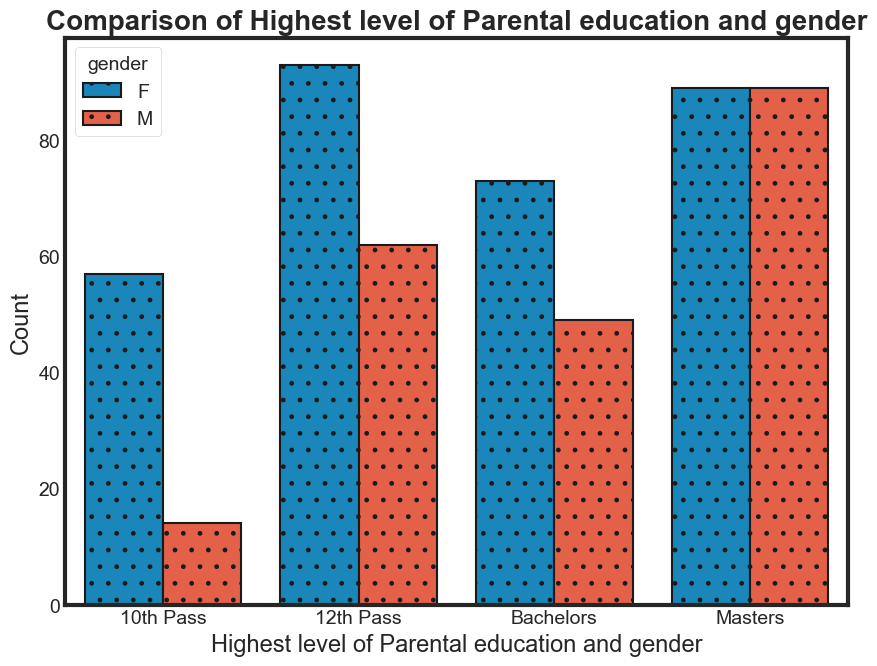

In [819]:
graph = sns.countplot(
    data, x="parentedu", edgecolor="0.1", linewidth=1.5, hatch=".", hue="gender"
)
graph.set_title(
    "Comparison of Highest level of Parental education and gender",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel(
    "Highest level of Parental education and gender", fontweight=20, fontsize=17
)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### God


Text(0, 0.5, 'Count')

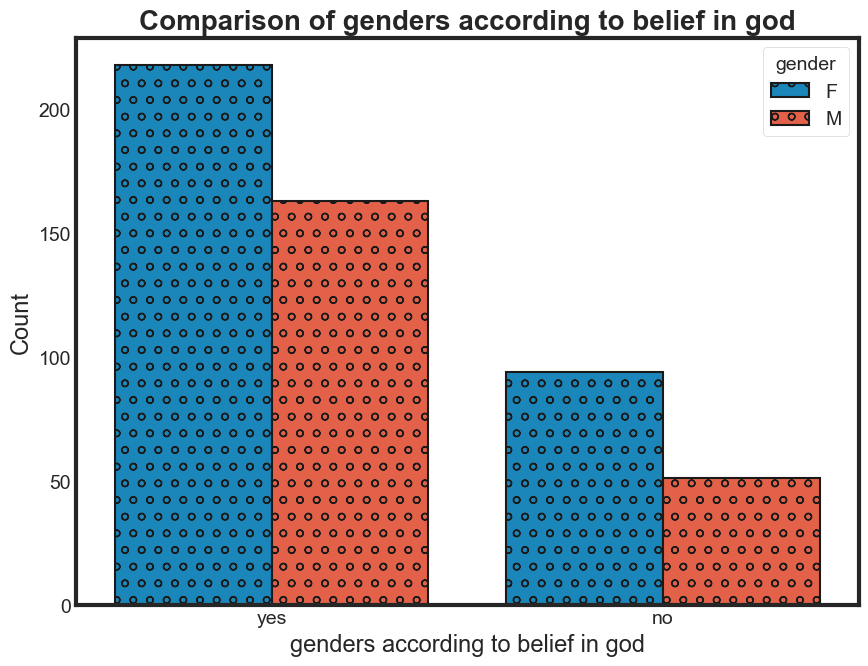

In [820]:
graph = sns.countplot(
    data, x="god", edgecolor="0.1", linewidth=1.5, hatch="o", hue="gender"
)
graph.set_title(
    "Comparison of genders according to belief in god", weight="bold", fontsize=20
)
graph.set_xlabel("genders according to belief in god", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


## Comparision analysis


### Parental level of education


Text(0.5, 20.583333333333293, 'Reason')

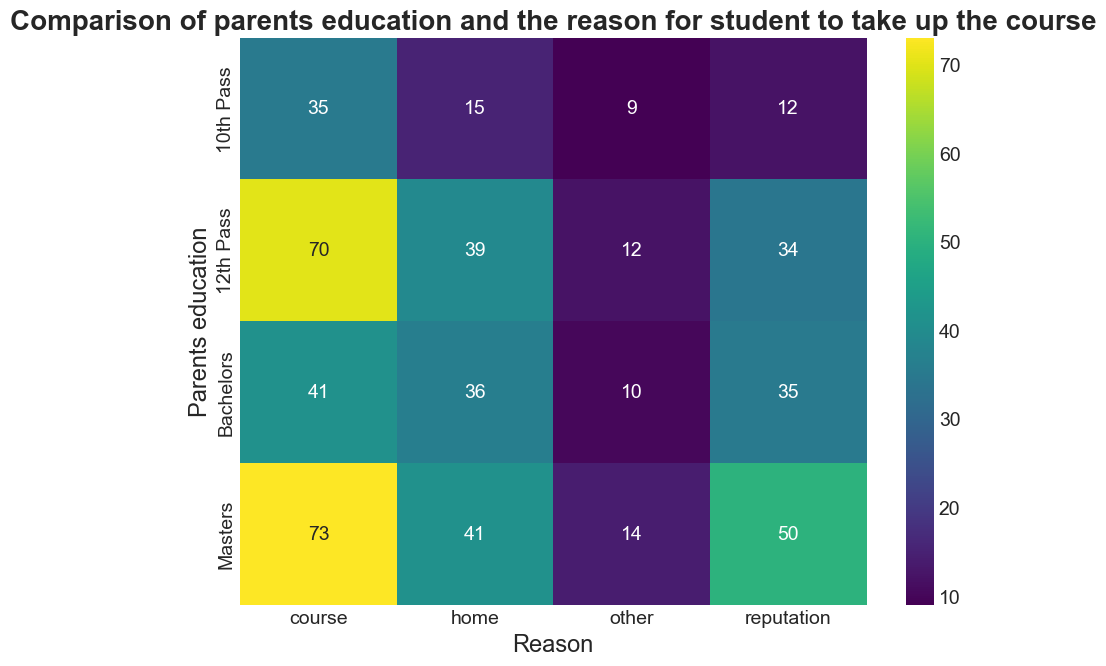

In [821]:
ct = pd.crosstab(data["parentedu"], data["reason"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of parents education and the reason for student to take up the course",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Parents education", fontweight=20, fontsize=17)
graph.set_xlabel("Reason", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

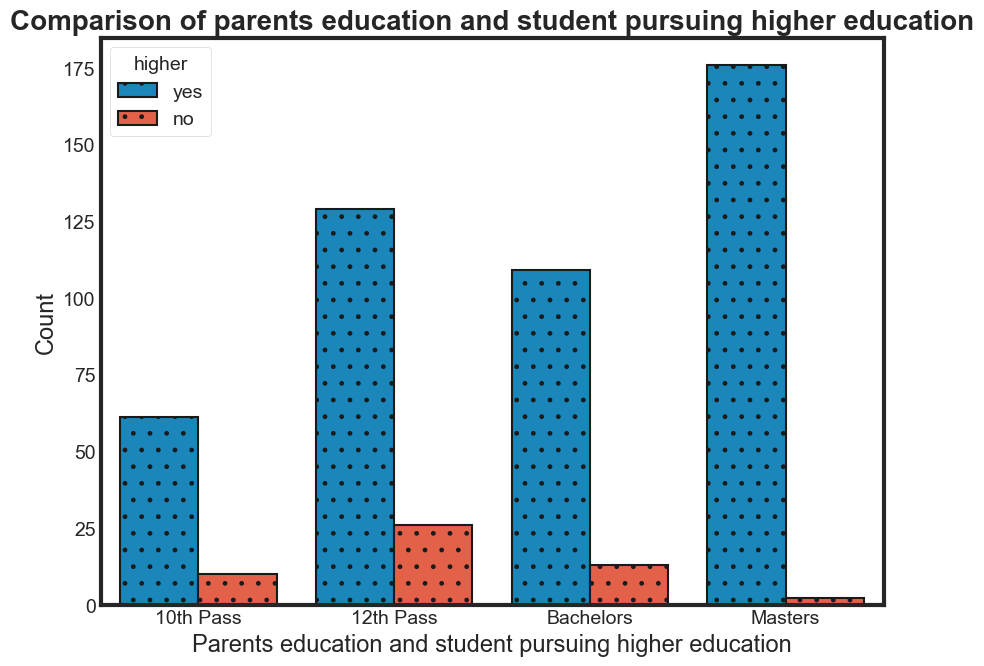

In [822]:
graph = sns.countplot(
    data, x="parentedu", edgecolor="0.1", linewidth=1.5, hatch=".", hue="higher"
)
graph.set_title(
    "Comparison of parents education and student pursuing higher education",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel(
    "Parents education and student pursuing higher education",
    fontweight=20,
    fontsize=17,
)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Studytime')

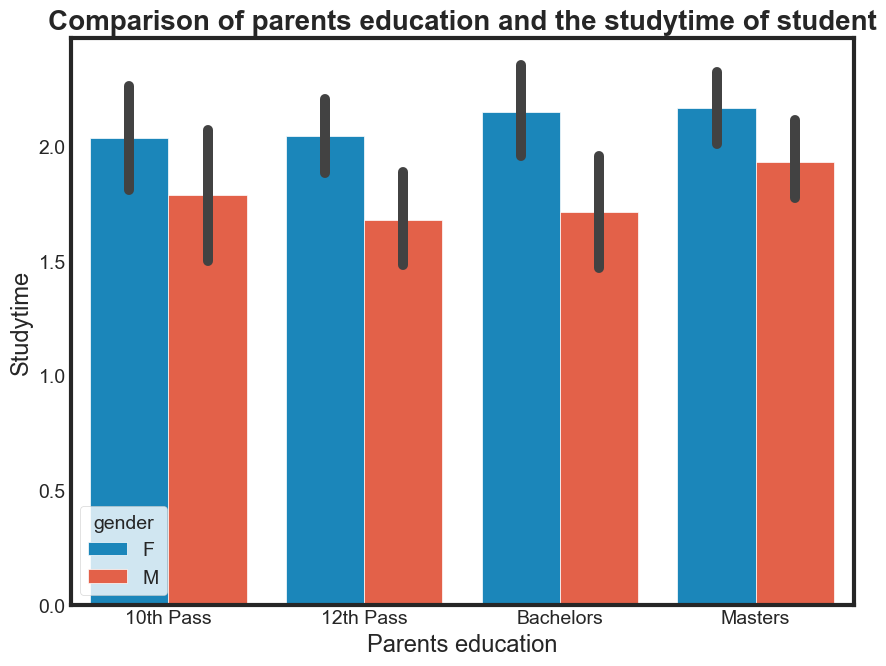

In [823]:
graph = sns.barplot(data, x="parentedu", y="studytime", hue="gender")
graph.set_title(
    "Comparison of parents education and the studytime of student",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Parents education", fontweight=20, fontsize=17)
graph.set_ylabel("Studytime", fontweight=20, fontsize=17)


Men in general studied less, especially those whose parents passed 12th studied the least


Text(0.5, 20.583333333333293, 'Reason')

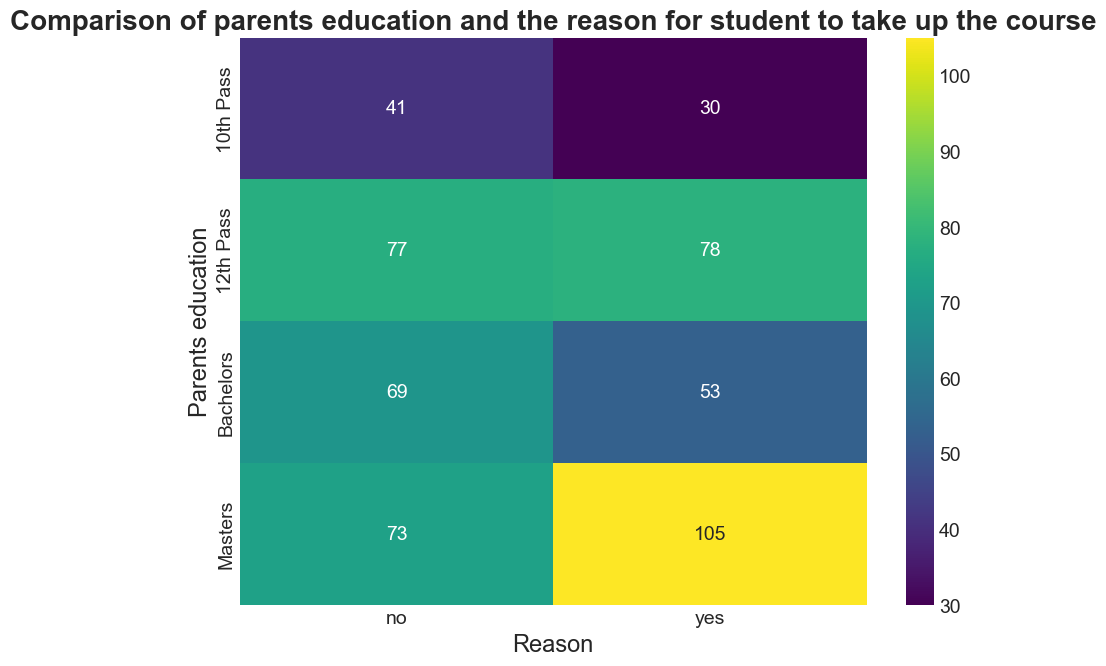

In [824]:
ct = pd.crosstab(data["parentedu"], data["activities"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of parents education and the reason for student to take up the course",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Parents education", fontweight=20, fontsize=17)
graph.set_xlabel("Reason", fontweight=20, fontsize=17)


### Grades


In [825]:
data["maths_le"] = le.fit_transform(data["maths"])
data["comp_sci_le"] = le.fit_transform(data["comp_sci"])
data["stats_le"] = le.fit_transform(data["stats"])


In [826]:
data["maths_le"].unique()


array([6, 4, 2, 3, 0, 1, 5])

In [827]:
data["comp_sci_le"].unique()


array([2, 3, 1, 0, 5, 4, 6, 7])

In [828]:
data["stats_le"].unique()


array([2, 3, 0, 1, 5, 4, 6, 7])